In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("train_V2.csv")

In [4]:
test = pd.read_csv("test_V2.csv")

In [5]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
print(train.shape,test.shape)

(4446966, 29) (1934174, 28)


In [8]:
print(train.info)

<bound method DataFrame.info of                      Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  kill

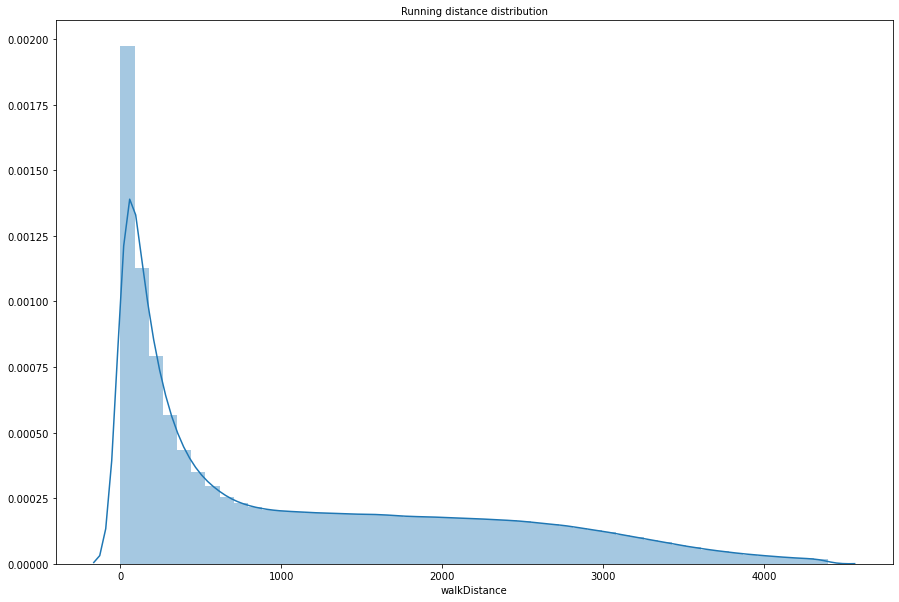

In [9]:
#Analysing Running in the game
data = train.copy()
data = data[data["walkDistance"] < train["walkDistance"].quantile(0.99)]
plt.figure(figsize = (15,10))
plt.title("Running distance distribution",fontsize = 10)
sns.distplot(data["walkDistance"])
plt.show()

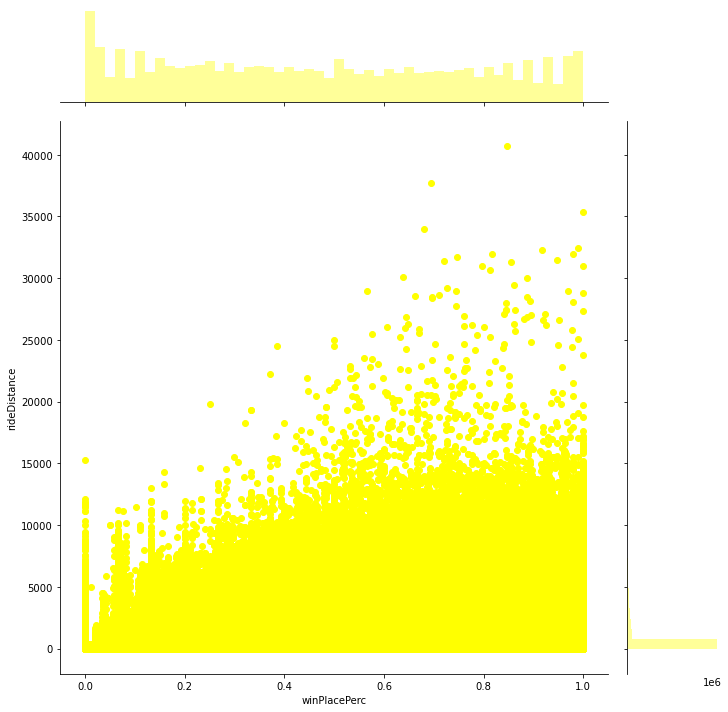

In [10]:
# Analysing riding distance against Winning
sns.jointplot(x = "winPlacePerc",y = "rideDistance", data = data, height = 10, color = "yellow")
plt.show()
# Cannot say that riding distance is affecting the winning

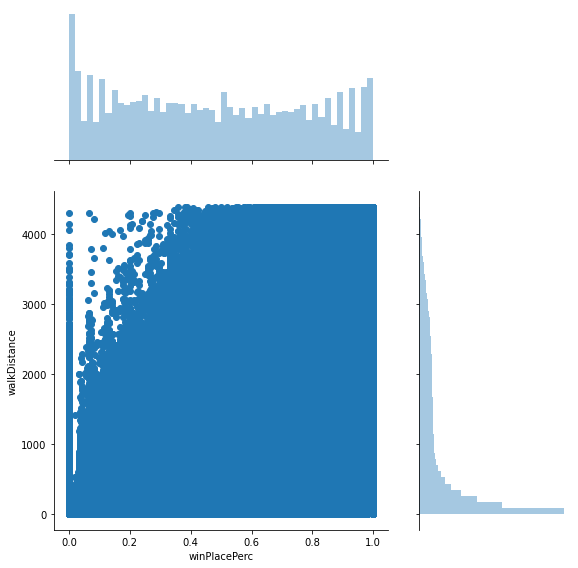

In [11]:
# Comparing Walking Distance and Winning
sns.jointplot(x = "winPlacePerc" , y = "walkDistance" , data = data, height = 8, ratio = 2)
plt.show()
# Conclusion - Walking distance is not the factor affecting the Winning

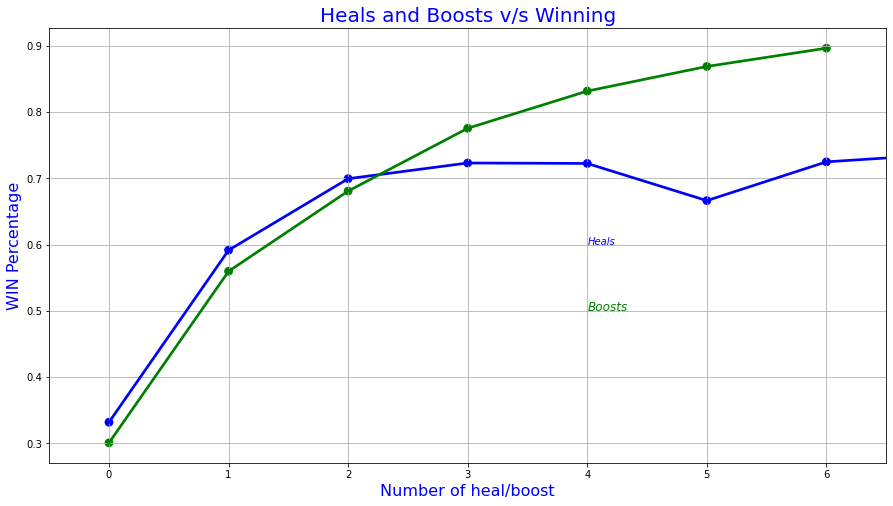

In [12]:
# Analysing Healing and Boosting will affect the Winning
data = train.copy()
data = data[data["heals"] < data["heals"].quantile(0.99)]
data = data[data["boosts"] < data["boosts"].quantile(0.99)]

f,ax1 = plt.subplots(figsize = (15,8))
sns.pointplot(x = "heals" , y = "winPlacePerc", data = data, color = "blue", alpha = 0.8)
sns.pointplot(x = "boosts" , y = "winPlacePerc", data = data, color = "green", alpha = 0.8)

plt.text(4,0.6, "Heals", color = "blue", fontsize = 10, style = "italic")
plt.text(4,0.5, "Boosts", color = "green", fontsize = 12, style = "italic")

plt.xlabel("Number of heal/boost", fontsize = 16, color = "blue")
plt.ylabel("WIN Percentage", fontsize = 16, color = "blue")
plt.title("Heals and Boosts v/s Winning" , fontsize = 20, color = "blue")
plt.grid()
plt.show()
# Chances of win is high if player uses more heals and boosts

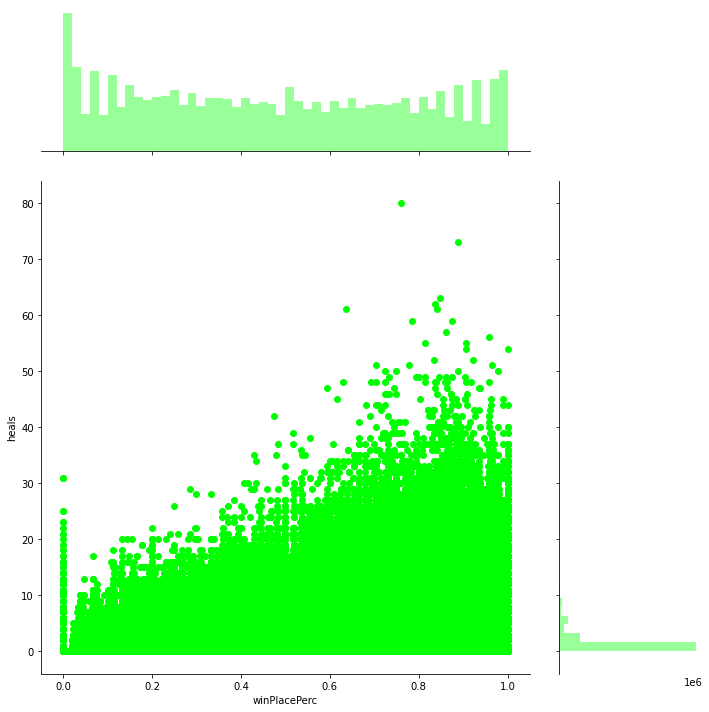

In [13]:
# Heals vs Winning
sns.jointplot(x = "winPlacePerc", y = "heals", data = train, height = 10, ratio = 3, color = "lime")
plt.show()
# there is a slight chance of winning incase of more heals

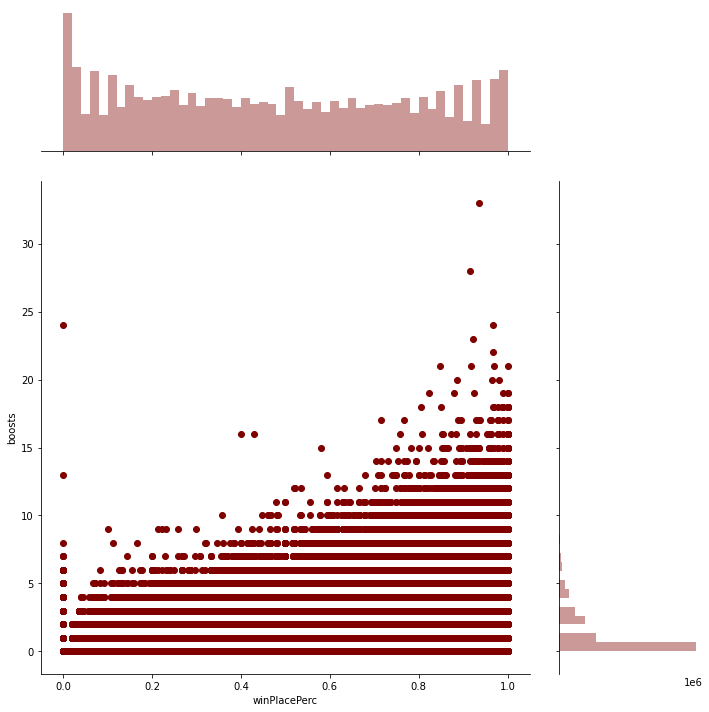

In [14]:
# Boosts vs Winning
sns.jointplot(x = "winPlacePerc", y = "boosts", data = train, height = 10, ratio = 3, color = "maroon")
plt.show()
# if the number of boosts increases winning chances increases

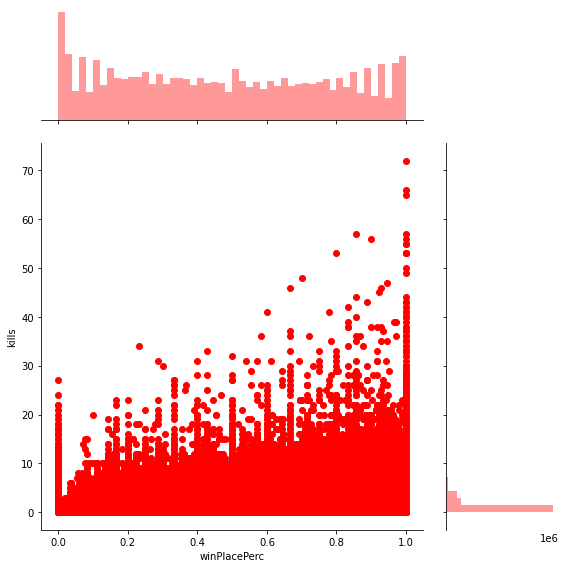

In [22]:
# Kills vs Winning
sns.jointplot(x = "winPlacePerc", y = "kills", data = train, height = 8, ratio = 3, color = "red")
plt.show()
#When kills are high, winning is high

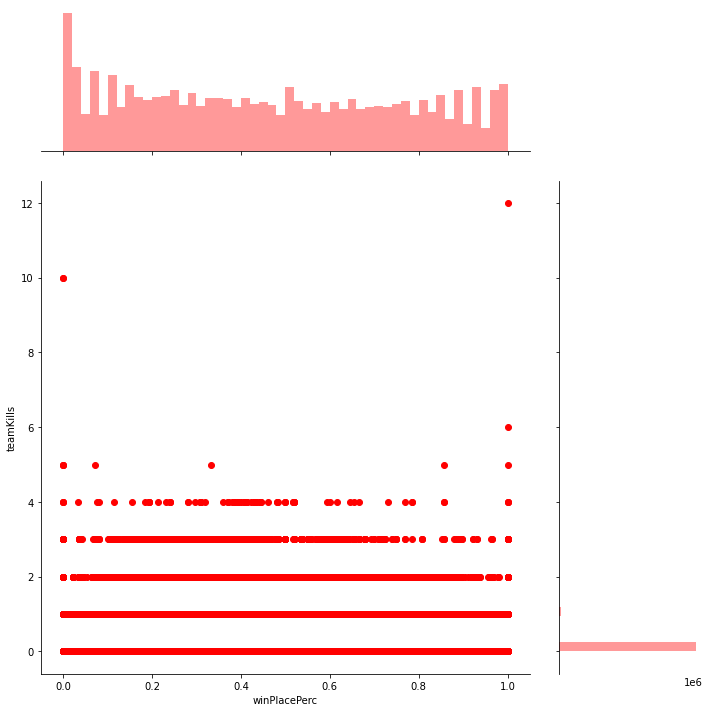

In [26]:
# team kills vs Winning
sns.jointplot(x = "winPlacePerc", y = "teamKills", data = data, height = 10, ratio = 3, color = "red")
plt.show()

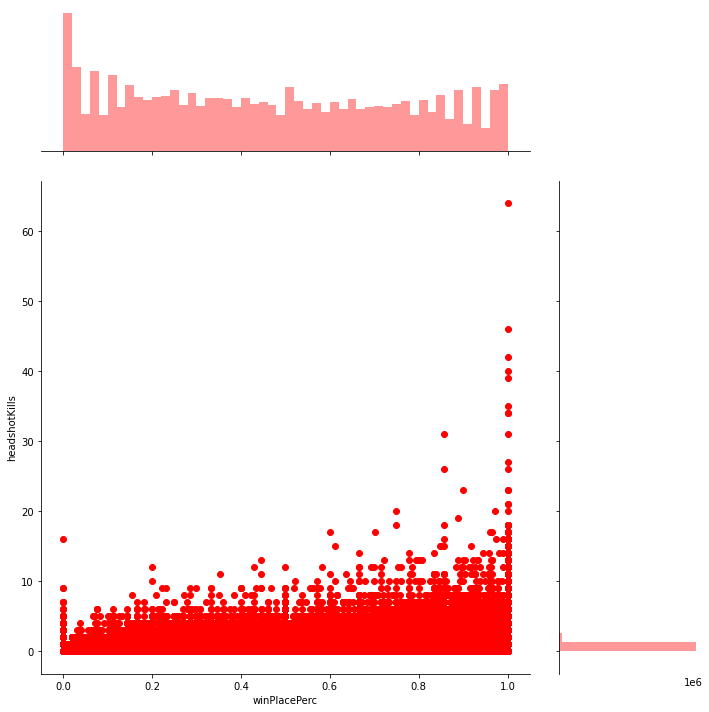

In [27]:
#Headshots vs Winning
sns.jointplot(x = "winPlacePerc", y = "headshotKills", data = data, height = 10, ratio = 3, color = "red")
plt.show()

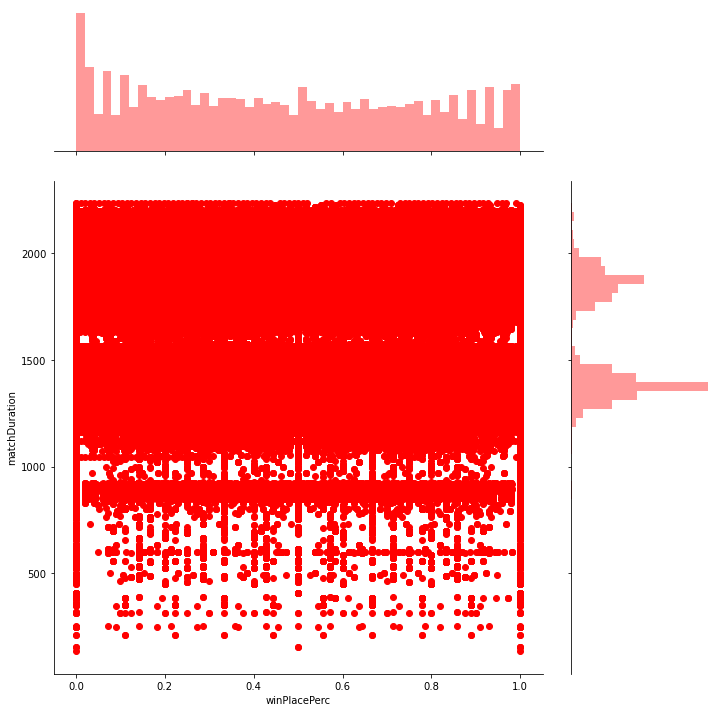

In [28]:
#Headshots vs Winning
sns.jointplot(x = "winPlacePerc", y = "matchDuration", data = data, height = 10, ratio = 3, color = "red")
plt.show()

## Identifying outliers

### found 216 players with more than 10 kills and not at all moved

In [38]:
#more than 10 kills without moving
train["totalDistance"] = train["rideDistance"] + train["walkDistance"] + train["swimDistance"]
train["killswithoutMoving"] = ((train["kills"] > 10) & (train["totalDistance"]==0))
print(train[train["killswithoutMoving"]].shape)
train[train["killswithoutMoving"]]

(216, 31)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killswithoutMoving
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0,0.0,0,0,0.0,13,0,0.8947,0.0,True
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.0,0,4,1,7,...,0,0.0,0,0,0.0,8,0,0.6000,0.0,True
36345,5cf4f90e24e26f,f84b7639c369c7,9c8962b58bb3e3,3,0,1114.0,0,0,0,4,...,0,0.0,0,0,0.0,22,1500,1.0000,0.0,True
57878,4cf42a5d238351,d6feec32a85a37,ed092b499ac27d,7,0,1458.0,0,6,0,8,...,0,0.0,1,0,0.0,37,1500,0.2000,0.0,True
97279,b1a89f5bfa80d1,fb7164eb0e0088,6680c7c3d17d48,11,3,1371.0,0,1,3,23,...,0,0.0,0,0,0.0,38,0,0.3571,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258892,6a205e33973818,1e9c6527d975e4,6bc71df7f5fcba,2,0,1136.0,0,5,0,9,...,0,0.0,0,0,0.0,19,1500,1.0000,0.0,True
4321820,b98651a6c573f1,2464dc3f77cd6b,b06aa721ab324a,8,0,1354.0,0,5,4,11,...,0,0.0,0,0,0.0,50,1500,0.2500,0.0,True
4386933,7c7dac3ae43e03,228b1df91576e9,8a728def0644be,5,0,1005.0,11,2,0,28,...,0,0.0,0,0,0.0,25,1500,0.3846,0.0,True
4418082,e9ba9ef7fb03e5,31dcca75f259cd,eb67db18550537,7,0,1857.0,0,2,3,15,...,0,0.0,1,0,0.0,33,1500,0.1429,0.0,True


In [54]:
# to find out players with more than 10 kills with no damage to them
train["killswithoutdamage"] = ((train["kills"]>10) & (train["heals"]==0))
print(train[train["killswithoutdamage"]].shape)
train[train["killswithoutdamage"]]
# found 925 players with more than 10 kills and not even used healing bandages even once

(925, 32)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killswithoutMoving,killswithoutdamage
12668,d68fc418d45e3d,471daeeed45c78,8c49194545f1b3,1,9,1191.0,7,1,0,1,...,0.0,0,0,3369.00,8,0,1.0000,4593.00,False,True
13131,3b5d06b8d5b8e9,7dce44e7c03146,a8d672663a32b1,2,0,1205.0,5,0,0,1,...,0.0,0,2,1153.00,1,0,1.0000,4637.00,False,True
13418,e17aabeb0af04d,5a8a87a3c05a02,6bc71df7f5fcba,3,0,1169.0,0,4,0,8,...,0.0,0,0,122.90,26,1500,0.8571,122.90,False,True
19531,ef706f0f248dbf,f27e63bfc6746c,7d2fd7f5d4f8b2,9,0,2856.0,32,3,0,1,...,0.0,0,0,1136.00,20,0,0.8000,1136.00,False,True
22389,5983e465259215,073b5cfb8f2b06,d4862967bcf3f0,2,0,1324.0,0,2,0,4,...,0.0,0,0,35.21,28,1500,0.5000,35.21,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418629,871c3cc7a672e7,cdf486b986ac62,bf0b1ec5a38f7d,4,0,1634.0,0,2,0,7,...,0.0,0,0,1026.00,34,0,0.6842,4678.00,False,True
4420651,50af4ef07d1c81,a913b5cae2fae2,a20eb097c8d8a6,4,0,1340.0,13,2,0,7,...,0.0,0,0,0.00,24,0,0.2000,0.00,True,True
4422538,502e7c4b858f43,164cf32990ef6f,10f129a6c2be8d,3,1,1389.0,0,8,0,1,...,0.0,0,0,699.10,16,1500,1.0000,699.10,False,True
4426908,b44116139a0746,eddfc937ecaeb1,7d2fd7f5d4f8b2,3,1,1000.0,10,1,0,13,...,0.0,0,0,191.10,28,0,1.0000,191.10,False,True


In [71]:
#players with more than 30 kills
train["morekills"] = (train["kills"]>30)
print(train[train["morekills"]].shape)
train[train["morekills"]]
#to remove 102 players with more than 30 kills

(102, 33)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killswithoutMoving,killswithoutdamage,morekills
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,0,0,48.82,48,1500,0.8571,48.82,False,True,True
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,0,0,780.70,45,1500,1.0000,780.70,False,False,True
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0,0,23.71,61,0,0.7000,23.71,False,False,True
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,1,0,718.30,16,1500,1.0000,718.30,False,True,True
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,0,0,71.51,41,0,1.0000,71.51,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021018,1f1c3dda0296df,7c95f475fd2cdb,a9e84c456cc859,6,0,3406.0,0,8,10,2,...,0,0,2264.00,40,0,0.9167,3817.00,False,False,True
4127904,f699c842c5dfab,9d69e4e697d296,1ac375e4121651,5,0,3420.0,39,20,1,1,...,0,0,319.20,29,1500,0.7500,319.20,False,False,True
4148675,5283367a7f8d06,35b9b765110fd2,f900de1ec39fa5,12,0,3050.0,0,5,4,7,...,0,0,123.80,89,0,0.4000,123.80,False,False,True
4235682,6874be9215646b,af1d17223258d0,0f09bd72c4ba97,1,0,3006.0,0,9,18,2,...,0,0,557.50,20,1500,0.4286,557.50,False,False,True


In [86]:
#players with zero boost and more than 20 kills
train["noboost_morekills"] = ((train["kills"] > 20) & (train["boosts"] ==0))
print(train[train["noboost_morekills"]].shape)
train[train["noboost_morekills"]]
#348 players with more than 20 kills and not even consumed energy drink even once

(348, 34)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killswithoutMoving,killswithoutdamage,morekills,noboost_morekills
19531,ef706f0f248dbf,f27e63bfc6746c,7d2fd7f5d4f8b2,9,0,2856.0,32,3,0,1,...,0,1136.00,20,0,0.8000,1136.00,False,True,False,True
40047,8d8d78ba4e9b55,6634da8e3940de,8a728def0644be,3,0,1988.0,22,6,5,5,...,0,1864.00,33,1500,1.0000,3532.00,False,False,False,True
53442,f7a740ffbc2c43,418f6120b2e193,f2614050e9046a,2,0,1906.0,0,4,19,2,...,0,116.70,16,0,1.0000,116.70,False,False,False,True
57490,367599b150318a,0370e2f3be345b,5f2f9fcb9705af,6,0,2459.0,0,3,0,2,...,0,208.50,12,0,0.8333,208.50,False,True,False,True
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,0,48.82,48,1500,0.8571,48.82,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381091,97bf68b6df93c2,afc31d91549183,17c643ab998ecb,7,0,2360.0,0,2,11,5,...,0,295.30,73,1500,0.3333,295.30,False,False,False,True
4399662,8800992f7dd530,87e52e1a6b0a73,1e573980b3ee3c,1,0,1999.0,0,1,8,5,...,0,111.80,59,1500,0.3333,111.80,False,False,False,True
4402706,f69c34cce4d46a,ea800ea1aa6efa,ed092b499ac27d,3,0,2817.0,0,6,2,3,...,0,1147.00,31,1500,0.4000,1147.00,False,False,False,True
4420563,0a2721fcf1cdd9,1708576031cf96,fcd20a43cb81ea,6,0,3297.0,0,5,4,1,...,0,253.00,32,0,1.0000,253.00,False,False,False,True
